In [1]:
import os
import numpy as np
import pandas as pd

file_dir = './repos/atp-matches-dataset/'
data_list = []
for file in os.listdir(file_dir):
     data_list.append(pd.read_csv(file_dir + file))
        
df = pd.concat(data_list, ignore_index=True)

In [2]:
df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
53566,2014-D078,Davis Cup G2 PO: IRL vs EGY,Hard,4,D,20140404.0,4.0,106387,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53567,2014-D079,Davis Cup G2 PO: MAR vs CYP,Clay,4,D,20140404.0,1.0,108749,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53568,2014-D079,Davis Cup G2 PO: MAR vs CYP,Clay,4,D,20140404.0,2.0,104467,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53569,2014-D079,Davis Cup G2 PO: MAR vs CYP,Clay,4,D,20140404.0,3.0,104467,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53570,2014-D079,Davis Cup G2 PO: MAR vs CYP,Clay,4,D,20140404.0,4.0,109336,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(53571, 49)

In [4]:
df.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size              object
tourney_level          object
tourney_date          float64
match_num             float64
winner_id              object
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
winner_rank           float64
winner_rank_points    float64
loser_id              float64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
loser_rank            float64
loser_rank_points     float64
score                  object
best_of               float64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt    

In [5]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2008-338,Sydney,Hard,32,A,20080107.0,1.0,104755,1.0,NaN,...,4.0,2.0,4.0,66.0,41.0,29.0,11.0,10.0,1.0,3.0
1,2008-338,Sydney,Hard,32,A,20080107.0,2.0,104098,NaN,NaN,...,4.0,2.0,1.0,54.0,37.0,23.0,7.0,9.0,2.0,6.0
2,2008-338,Sydney,Hard,32,A,20080107.0,3.0,103206,NaN,NaN,...,6.0,5.0,1.0,98.0,63.0,34.0,20.0,13.0,6.0,11.0
3,2008-338,Sydney,Hard,32,A,20080107.0,4.0,104269,8.0,NaN,...,8.0,11.0,5.0,99.0,54.0,35.0,19.0,13.0,8.0,13.0
4,2008-338,Sydney,Hard,32,A,20080107.0,5.0,102148,NaN,NaN,...,8.0,3.0,1.0,57.0,31.0,21.0,10.0,10.0,2.0,7.0


In [6]:
df['tourney_id'].value_counts()
# running into a problem with data types and validity
# need unique IDs for each game at each tournament (but tourney_id is bad and tourney_date is bad)
# find some unique id in combining tourney_date and match_number

2006-520               127
2005-560               127
2010-540               127
2013-540               127
2007-540               127
                      ... 
Seong Chan Hong          1
Enrique Lopez Perez      1
Shahin Khaledan          1
Tomislav Ternar          1
Gabor Borsos             1
Name: tourney_id, Length: 2852, dtype: int64

In [7]:
df['match_num'].value_counts()

1.0       2406
2.0       2398
3.0       2392
4.0       2315
6.0       1086
          ... 
6315.0       1
415.0        1
823.0        1
316.0        1
1550.0       1
Name: match_num, Length: 1226, dtype: int64

In [8]:
df['winner_id'].value_counts()
#need to remove the wonky data

103819                 1054
104745                  774
104925                  695
103970                  662
104053                  614
                       ... 
3-6 7-6(6) 7-6(1)         1
7-6(11) 7-6(7)            1
103032                    1
7-6 3-6 6-7 7-5 6-2       1
6-7(1) 6-3 6-3            1
Name: winner_id, Length: 2804, dtype: int64

In [9]:
df[df['tourney_id'].str.contains('a', na=False)]
#appears as if all the shitty data is related... 

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
34437,Bernard Tomic,R,193,AUS,23.2033,18.0,1675.0,7-6(5) 7-6(5),3.0,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34439,Marin Cilic,R,198,CRO,27.2663,13.0,2405.0,2-6 7-6(4) 6-4,3.0,QF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34440,Lucas Pouille,R,NaN,FRA,21.8617,78.0,672.0,6-4 6-4,3.0,QF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34442,Tobias Kamke,R,180,GER,29.6235,277.0,185.0,6-2 6-1,3.0,R16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34445,Denis Kudla,R,180,USA,23.3812,69.0,719.0,6-3 6-2,3.0,R16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37820,Karen Khachanov,R,NaN,RUS,20.6954,52.0,904.0,6-4 6-7(3) 6-3 1-6 7-6(6),5.0,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37821,Daniil Medvedev,R,NaN,RUS,20.9692,63.0,749.0,3-6 6-4 6-1 1-0 RET,3.0,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37822,Nenad Zimonjic,R,190,SRB,40.6571,NaN,NaN,Walkover,3.0,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37823,Marco Chiudinelli,R,185,SUI,35.3895,146.0,414.0,6-4 6-3 6-1,5.0,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
checkThis = ['l_ace']
betterData = df.dropna(subset = checkThis)
betterData.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
53264,2014-605,Tour Finals,Hard,8,F,20141109.0,10.0,105453,4.0,NaN,...,9.0,2.0,3.0,88.0,48.0,30.0,20.0,14.0,4.0,9.0
53265,2014-605,Tour Finals,Hard,8,F,20141109.0,11.0,103819,2.0,NaN,...,4.0,10.0,2.0,60.0,28.0,22.0,15.0,9.0,4.0,6.0
53266,2014-605,Tour Finals,Hard,8,F,20141109.0,12.0,104918,5.0,NaN,...,1.0,4.0,2.0,62.0,33.0,23.0,14.0,10.0,2.0,5.0
53267,2014-605,Tour Finals,Hard,8,F,20141109.0,14.0,104925,1.0,NaN,...,4.0,3.0,6.0,67.0,38.0,29.0,5.0,11.0,3.0,9.0
53268,2014-605,Tour Finals,Hard,8,F,20141109.0,13.0,103819,2.0,NaN,...,6.0,10.0,4.0,123.0,47.0,38.0,36.0,17.0,6.0,9.0


In [11]:
betterData.shape

(44451, 49)

In [12]:
betterData['match_num'].value_counts()

11.0     1071
10.0     1071
8.0      1070
7.0      1070
12.0     1069
         ... 
105.0      63
102.0      63
103.0      63
101.0      62
113.0      61
Name: match_num, Length: 127, dtype: int64

In [13]:
betterData['tourney_id'].value_counts()

2008-540    127
2010-520    127
2000-560    127
2002-580    127
2011-580    127
           ... 
2014-605     14
2002-605     14
2004-605     13
2003-605     13
2000-605     11
Name: tourney_id, Length: 1072, dtype: int64

In [14]:
# could change the tourney_date to a date time type 
# data['date'] = pd.to_datetime(data['date']) 
# data.groupby('date').mean().plot()

In [15]:
if betterData['winner_hand'][6] == 'L': 
    print("True")
else: 
    print("False")

False


In [16]:
bestData = betterData.dropna(subset = ['winner_hand', 'loser_hand'])
bestData.shape

(44451, 49)

In [17]:
bestData.groupby('winner_hand').count()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
winner_hand,,,,,,,,,,,,,,,,,,,,,
L,5323,5323,5323,5323,5323,5323,5323,5323,2080,817,...,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323
R,39080,39080,39080,39080,39080,39080,39080,39080,18425,4980,...,39080,39080,39080,39080,39080,39080,39080,39080,39080,39080
U,48,48,48,48,48,48,48,48,0,40,...,48,48,48,48,48,48,48,48,48,48


In [18]:
new_info = bestData.loc[bestData['winner_hand'] == 'U']
#new_info.groupby('winner_name').count()

testing = bestData.loc[bestData['winner_name'] == "Ante Pavic"]
testing.groupby('winner_hand').count()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
winner_hand,,,,,,,,,,,,,,,,,,,,,
U,2,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,2


In [19]:
bestData.groupby('winner_id').count()
#777 different players to get stats on 
bestData.groupby('loser_id').count()

some_losers = bestData['loser_id']
total_losers = []

for elem in some_losers:
    # Check if the element exists in dataframe values
    if elem not in bestData['winner_id'].values:
        total_losers.append(elem)

In [20]:
len(total_losers)

750

In [21]:
#lvl = []
#lvr = []
#rvl = []
#rvr = []

# first thought was to make a dictionary, convert it to a pandas df, then merge... 
# loops/conditionals work but currently jsut using it to validate my later data
test_dict = {}

for i in bestData.index:
    values = []
    if bestData.loc[i, 'winner_hand'] is 'L':
        if bestData.loc[i, 'loser_hand'] is 'L':
            values = [1,0,0,0]
        else: 
            values = [0,1,0,0]
    else: 
        if bestData.loc[i,'loser_hand'] is 'L':
            values = [0,0,1,0]
        else: 
            values = [0,0,0,1]
    test_dict[i] = values
    
test_dict

{0: [0, 0, 0, 1],
 1: [0, 0, 0, 1],
 2: [0, 0, 0, 1],
 3: [1, 0, 0, 0],
 4: [0, 0, 0, 1],
 5: [0, 0, 0, 1],
 6: [0, 0, 0, 1],
 7: [0, 0, 0, 1],
 8: [0, 0, 0, 1],
 9: [0, 1, 0, 0],
 10: [0, 0, 0, 1],
 11: [0, 0, 0, 1],
 12: [0, 0, 1, 0],
 13: [0, 0, 0, 1],
 14: [0, 0, 0, 1],
 15: [0, 0, 0, 1],
 16: [0, 0, 0, 1],
 17: [0, 0, 1, 0],
 18: [0, 0, 0, 1],
 19: [0, 0, 0, 1],
 20: [0, 1, 0, 0],
 21: [0, 0, 0, 1],
 22: [0, 0, 0, 1],
 23: [0, 0, 0, 1],
 24: [0, 0, 0, 1],
 25: [0, 0, 0, 1],
 26: [0, 1, 0, 0],
 27: [0, 0, 0, 1],
 28: [0, 0, 0, 1],
 29: [0, 1, 0, 0],
 30: [0, 0, 1, 0],
 31: [0, 0, 0, 1],
 32: [0, 0, 0, 1],
 33: [0, 0, 1, 0],
 34: [0, 0, 0, 1],
 35: [0, 0, 0, 1],
 36: [0, 1, 0, 0],
 37: [0, 1, 0, 0],
 38: [0, 0, 1, 0],
 39: [0, 1, 0, 0],
 40: [0, 0, 0, 1],
 41: [0, 0, 0, 1],
 42: [0, 0, 0, 1],
 43: [0, 0, 0, 1],
 44: [0, 0, 1, 0],
 45: [0, 0, 0, 1],
 46: [0, 0, 0, 1],
 47: [0, 0, 0, 1],
 48: [0, 0, 0, 1],
 49: [0, 1, 0, 0],
 50: [0, 1, 0, 0],
 51: [0, 1, 0, 0],
 53: [0, 0, 0, 1],
 54

In [22]:
bestData.loc[1003, 'winner_hand']

'R'

In [23]:
new_columns = bestData
new_columns['lvl'] = np.nan
new_columns['lvr'] = np.nan
new_columns['rvl'] = np.nan
new_columns['rvr'] = np.nan

for i in new_columns.index:
    #values = []
    if new_columns.loc[i, 'winner_hand'] is 'L':
        if new_columns.loc[i, 'loser_hand'] is 'L':
            new_columns.loc[i, 'lvl'] = 1
        else: 
            new_columns.loc[i, 'lvr'] = 1
    else: 
        if new_columns.loc[i,'loser_hand'] is 'L':
            new_columns.loc[i, 'rvl'] = 1
        else: 
            new_columns.loc[i, 'rvr'] = 1
    
new_columns.head()    


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,lvl,lvr,rvl,rvr
0,2008-338,Sydney,Hard,32,A,20080107.0,1.0,104755,1.0,NaN,...,41.0,29.0,11.0,10.0,1.0,3.0,NaN,NaN,NaN,1.0
1,2008-338,Sydney,Hard,32,A,20080107.0,2.0,104098,NaN,NaN,...,37.0,23.0,7.0,9.0,2.0,6.0,NaN,NaN,NaN,1.0
2,2008-338,Sydney,Hard,32,A,20080107.0,3.0,103206,NaN,NaN,...,63.0,34.0,20.0,13.0,6.0,11.0,NaN,NaN,NaN,1.0
3,2008-338,Sydney,Hard,32,A,20080107.0,4.0,104269,8.0,NaN,...,54.0,35.0,19.0,13.0,8.0,13.0,1.0,NaN,NaN,NaN
4,2008-338,Sydney,Hard,32,A,20080107.0,5.0,102148,NaN,NaN,...,31.0,21.0,10.0,10.0,2.0,7.0,NaN,NaN,NaN,1.0


In [24]:
new_columns['lvl'].fillna(0, inplace=True)
new_columns['lvr'].fillna(0, inplace=True)
new_columns['rvl'].fillna(0, inplace=True)
new_columns['rvr'].fillna(0, inplace=True)

new_columns.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,lvl,lvr,rvl,rvr
0,2008-338,Sydney,Hard,32,A,20080107.0,1.0,104755,1.0,NaN,...,41.0,29.0,11.0,10.0,1.0,3.0,0.0,0.0,0.0,1.0
1,2008-338,Sydney,Hard,32,A,20080107.0,2.0,104098,NaN,NaN,...,37.0,23.0,7.0,9.0,2.0,6.0,0.0,0.0,0.0,1.0
2,2008-338,Sydney,Hard,32,A,20080107.0,3.0,103206,NaN,NaN,...,63.0,34.0,20.0,13.0,6.0,11.0,0.0,0.0,0.0,1.0
3,2008-338,Sydney,Hard,32,A,20080107.0,4.0,104269,8.0,NaN,...,54.0,35.0,19.0,13.0,8.0,13.0,1.0,0.0,0.0,0.0
4,2008-338,Sydney,Hard,32,A,20080107.0,5.0,102148,NaN,NaN,...,31.0,21.0,10.0,10.0,2.0,7.0,0.0,0.0,0.0,1.0


In [25]:
new_columns.groupby('winner_age').sum()
# we should make these... normal ages

,tourney_date,match_num,winner_seed,winner_ht,winner_rank,winner_rank_points,loser_id,loser_seed,loser_ht,loser_age,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,lvl,lvr,rvl,rvr
winner_age,,,,,,,,,,,,,,,,,,,,,
15.824778,20020415.0,7.0,0.0,185.0,589.0,29.0,102644.0,0.0,183.0,26.647502,...,53.0,35.0,18.0,17.0,0.0,8.0,0.0,0.0,1.0,0.0
15.904175,20020429.0,6.0,0.0,185.0,762.0,14.0,102887.0,0.0,185.0,25.453799,...,41.0,23.0,5.0,10.0,2.0,7.0,0.0,1.0,0.0,0.0
15.937029,20080414.0,2.0,0.0,183.0,1277.0,3.0,104655.0,0.0,180.0,22.283368,...,29.0,18.0,10.0,9.0,2.0,6.0,0.0,0.0,0.0,1.0
16.246407,20090119.0,51.0,0.0,193.0,768.0,42.0,103808.0,0.0,188.0,27.518138,...,112.0,84.0,26.0,22.0,10.0,13.0,0.0,0.0,0.0,1.0
16.533881,20021230.0,7.0,0.0,185.0,0.0,0.0,103324.0,0.0,185.0,23.882272,...,47.0,31.0,24.0,14.0,3.0,6.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36.892539,20151019.0,3.0,0.0,185.0,259.0,187.0,110602.0,0.0,0.0,22.140999,...,50.0,37.0,6.0,10.0,7.0,11.0,0.0,0.0,0.0,1.0
37.180014,20150608.0,2.0,0.0,188.0,0.0,0.0,105062.0,0.0,183.0,27.449692,...,35.0,23.0,11.0,11.0,1.0,5.0,0.0,0.0,0.0,1.0
37.237509,20150629.0,31.0,0.0,188.0,861.0,20.0,105583.0,0.0,180.0,24.996578,...,66.0,36.0,20.0,17.0,8.0,14.0,0.0,0.0,0.0,1.0


In [26]:
new_columns.groupby('tourney_id').count()

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,lvl,lvr,rvl,rvr
tourney_id,,,,,,,,,,,,,,,,,,,,,
2000-301,31,31,31,31,31,31,31,14,5,31,...,31,31,31,31,31,31,31,31,31,31
2000-306,31,31,31,31,31,31,31,8,1,31,...,31,31,31,31,31,31,31,31,31,31
2000-308,30,30,30,30,30,30,30,16,4,30,...,30,30,30,30,30,30,30,30,30,30
2000-311,55,55,55,55,55,55,55,23,7,55,...,55,55,55,55,55,55,55,55,55,55
2000-314,30,30,30,30,30,30,30,17,0,30,...,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-741,47,47,47,47,47,47,47,14,4,47,...,47,47,47,47,47,47,47,47,47,47
2015-747,31,31,31,31,31,31,31,15,4,31,...,31,31,31,31,31,31,31,31,31,31
2015-773,27,27,27,27,27,27,27,16,2,27,...,27,27,27,27,27,27,27,27,27,27


In [27]:
new_columns.groupby(['tourney_id'])['match_num'].count()

tourney_id
2000-301    31
2000-306    31
2000-308    30
2000-311    55
2000-314    30
            ..
2015-741    47
2015-747    31
2015-773    27
2015-807    31
2015-891    27
Name: match_num, Length: 1072, dtype: int64

In [28]:
new_columns['unique_id'] = df.tourney_id.astype(str) + df.match_num.astype(str)
#print (new_columns)

In [29]:
keep = ['winner_id','loser_id','winner_hand','loser_hand', 'winner_seed','loser_seed','unique_id','lvl','lvr','rvl','rvr']

In [67]:
new_df = new_columns[keep]
#print(new_df)

In [68]:
new_df['playerA_win'] = 1
new_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,winner_id,loser_id,winner_hand,loser_hand,winner_seed,loser_seed,unique_id,lvl,lvr,rvl,rvr,playerA_win
0,104755,104214.0,R,R,1.0,NaN,2008-3381.0,0.0,0.0,0.0,1.0,1
1,104098,104527.0,R,R,NaN,NaN,2008-3382.0,0.0,0.0,0.0,1.0,1
2,103206,103429.0,R,R,NaN,NaN,2008-3383.0,0.0,0.0,0.0,1.0,1
3,104269,103852.0,L,L,8.0,NaN,2008-3384.0,1.0,0.0,0.0,0.0,1
4,102148,103484.0,R,R,NaN,3.0,2008-3385.0,0.0,0.0,0.0,1.0,1


In [69]:
other_df = new_columns
other_df['unique_id'] = df.tourney_id.astype(str) + df.match_num.astype(str)
#print (other_df)

In [70]:
keep_but_different = ['loser_id','winner_id','loser_hand','winner_hand','loser_seed','winner_seed','unique_id','lvl','lvr','rvl','rvr']
new_df_other = other_df[keep_but_different]
new_df_other['playerA_win'] = 0
#new_df_other.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
new_df = new_df.rename(columns={"winner_id": "playerA", "loser_id": "playerB", "winner_hand": "playerA_hand", "loser_hand" : "playerB_hand", "winner_seed": "playerA_seed", "loser_seed": "playerB_seed"})
new_df_other = new_df_other.rename(columns = {"loser_id": "playerA", "winner_id": "playerB", "loser_hand": "playerA_hand", "winner_hand" : "playerB_hand", "winner_seed": "playerB_seed", "loser_seed": "playerA_seed"})

#new_df.head(5)

In [35]:
new_df_other.head(5)

,playerA,playerB,playerA_hand,playerB_hand,playerA_seed,playerB_seed,unique_id,lvl,lvr,rvl,rvr,playerA_win
0,104214.0,104755,R,R,NaN,1.0,2008-3381.0,0.0,0.0,0.0,1.0,0
1,104527.0,104098,R,R,NaN,NaN,2008-3382.0,0.0,0.0,0.0,1.0,0
2,103429.0,103206,R,R,NaN,NaN,2008-3383.0,0.0,0.0,0.0,1.0,0
3,103852.0,104269,L,L,NaN,8.0,2008-3384.0,1.0,0.0,0.0,0.0,0
4,103484.0,102148,R,R,3.0,NaN,2008-3385.0,0.0,0.0,0.0,1.0,0


In [72]:
frames = [new_df, new_df_other]

In [73]:
test_this = pd.concat(frames)
look_here = test_this
test_this.sort_values(by = 'unique_id', ascending = True).head()

,playerA,playerB,playerA_hand,playerB_hand,playerA_seed,playerB_seed,unique_id,lvl,lvr,rvl,rvr,playerA_win
48447,101543,103163,L,R,NaN,1.0,2000-3011.0,0.0,0.0,1.0,0.0,0
48447,103163,101543,R,L,1.0,NaN,2000-3011.0,0.0,0.0,1.0,0.0,1
48456,103082,102494,R,R,NaN,NaN,2000-30110.0,0.0,0.0,0.0,1.0,0
48456,102494,103082,R,R,NaN,NaN,2000-30110.0,0.0,0.0,0.0,1.0,1
48457,102227,103292,R,R,NaN,NaN,2000-30111.0,0.0,0.0,0.0,1.0,0


In [77]:
test_this.describe()

,playerA,playerB,playerA_seed,playerB_seed,lvl,lvr,rvl,rvr,playerA_win
count,88902.000000,88902.000000,31460.000000,31460.000000,88902.000000,88902.000000,88902.000000,88902.000000,88902.000000
mean,103836.325280,103836.325280,7.810362,7.810362,0.015140,0.104610,0.114733,0.765517,0.500000
std,1138.518389,1138.518389,6.916040,6.916040,0.122111,0.306051,0.318701,0.423678,0.500003
min,100644.000000,100644.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103153.000000,103153.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,103835.000000,103835.000000,6.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,104559.000000,104559.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,144719.000000,144719.000000,35.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
test_this.shape

(88902, 12)

In [79]:
test_this['playerA_seed'].fillna(test_this['playerA_seed'].mean(), inplace=True)
test_this['playerB_seed'].fillna(test_this['playerB_seed'].mean(), inplace=True)
test_this.head()

,playerA,playerB,playerA_hand,playerB_hand,playerA_seed,playerB_seed,unique_id,lvl,lvr,rvl,rvr,playerA_win
0,104755,104214.0,R,R,1.000000,7.810362,2008-3381.0,0.0,0.0,0.0,1.0,1
1,104098,104527.0,R,R,7.810362,7.810362,2008-3382.0,0.0,0.0,0.0,1.0,1
2,103206,103429.0,R,R,7.810362,7.810362,2008-3383.0,0.0,0.0,0.0,1.0,1
3,104269,103852.0,L,L,8.000000,7.810362,2008-3384.0,1.0,0.0,0.0,0.0,1
4,102148,103484.0,R,R,7.810362,3.000000,2008-3385.0,0.0,0.0,0.0,1.0,1


In [80]:
test_this[['playerA', 'playerB']] = test_this[['playerA', 'playerB']].apply(pd.to_numeric)
test_this.dtypes

playerA           int64
playerB         float64
playerA_hand     object
playerB_hand     object
playerA_seed    float64
playerB_seed    float64
unique_id        object
lvl             float64
lvr             float64
rvl             float64
rvr             float64
playerA_win       int64
dtype: object

In [81]:
look_here[['playerA', 'playerB']] = look_here[['playerA', 'playerB']].apply(pd.to_numeric)
#test_this.dtypes

In [82]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus

In [83]:
feature_cols = ['playerA', 'playerB','playerA_seed','playerB_seed','lvl','lvr','rvl','rvr']
X = test_this[feature_cols] # Features
y = test_this.playerA_win # Target variable

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [85]:
# Create Decision Tree classifer object
TT = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 500)

# Train Decision Tree Classifer
TT = TT.fit(X_train,y_train)

#Predict the response for test dataset
preds_test = TT.predict(X_test)
preds_train = TT.predict(X_train)

In [86]:
acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))
#fix this by removing outliers, sparse columns, 

test acc 0.6285103670653519, 
train acc 0.6359692114862368


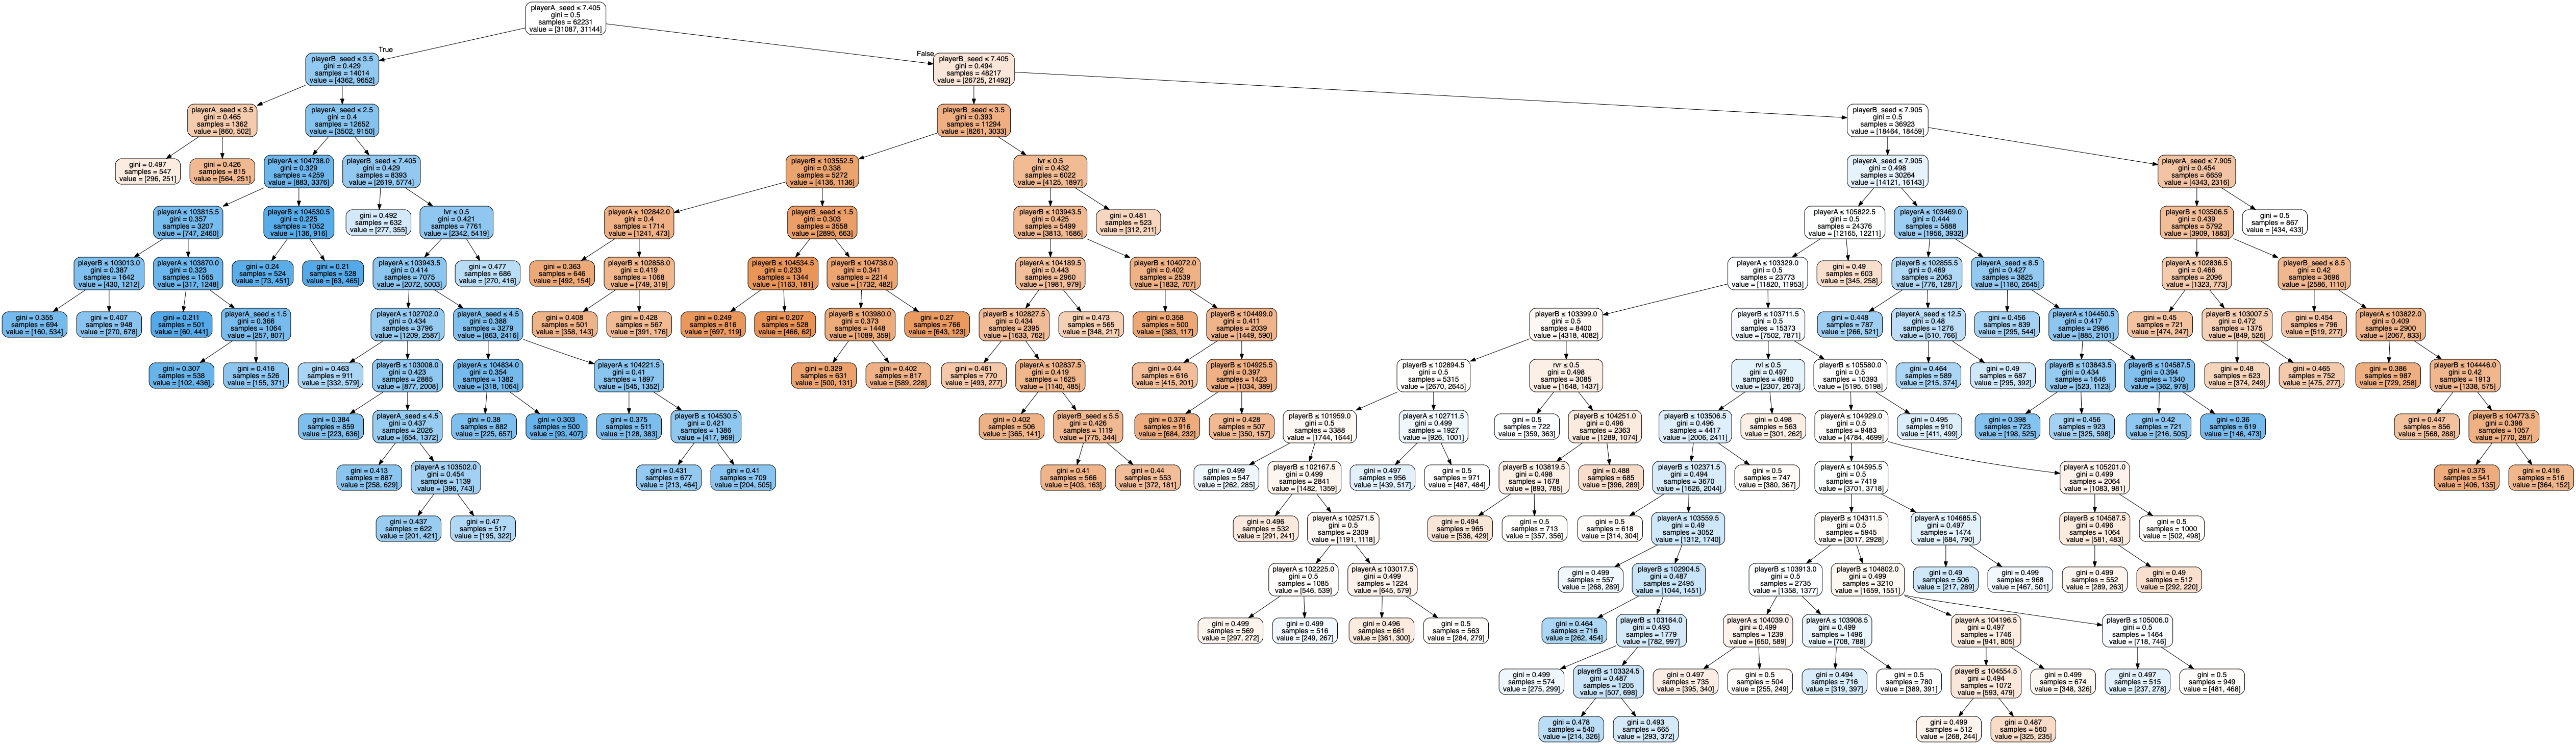

In [66]:
dot_data = StringIO()

export_graphviz(TT, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# this is what we believe to be the best model, but it pays a lot of attention to seed, and I don't think we wanted to 
# isolate that variable... while it is important... is it what we care about? 

+ our questions: how to check what has the most impact (once we throw in our other stuff... should we throw in our other stuff)? 
+ how to less fit this - only really looking at a handful of columns, filled most NA values with means --> should we bring the NA's back? 
+ going to optimize height of tree, like clusters. yay or nay? 

In [117]:
feature_cols = ['lvl','lvr','rvl','rvr']
X = test_this[feature_cols] # Features
y = test_this.playerA_win # Target variable

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [119]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [120]:
df.sort_values(by = 'test', ascending = False)

,levels,leaves,train,test
0,3,20,0.500683,0.498407
269,5,750,0.500683,0.498407
267,5,730,0.500683,0.498407
266,5,720,0.500683,0.498407
265,5,710,0.500683,0.498407
...,...,...,...,...
128,4,320,0.500683,0.498407
127,4,310,0.500683,0.498407
126,4,300,0.500683,0.498407
125,4,290,0.500683,0.498407


In [121]:
# Create Decision Tree classifer object
best_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)

# Train Decision Tree Classifer
best_model = best_model.fit(X_train,y_train)


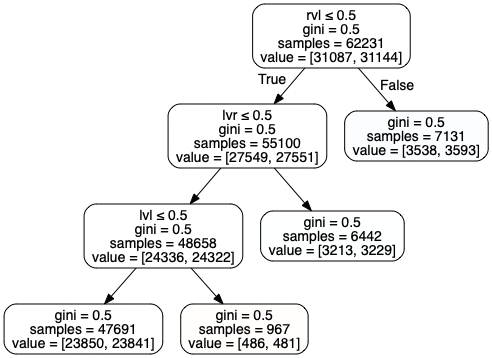

In [122]:
dot_data = StringIO()

export_graphviz(best_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# honestly im not really sure what this model is telling us...and i dont think it's what we want! 
# maybe that 7131 rights won against rights
# 6442 rights won against lefts
# 967 lefts won againts rights
# 47691 lefts won against lefts
# we could have gotten this from counting the columns and can validate it by counting the columns 

In [123]:
feature_cols = ['playerA','playerB','lvl','lvr','rvl','rvr']
X = test_this[feature_cols] # Features
y = test_this.playerA_win # Target variable

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [125]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [126]:
df.sort_values(by = 'test', ascending = False)

,levels,leaves,train,test
307,6,150,0.564076,0.563833
306,6,140,0.564076,0.563833
308,6,160,0.564076,0.563833
301,6,90,0.563770,0.563346
294,6,20,0.564478,0.563271
...,...,...,...,...
47,3,490,0.530764,0.532338
46,3,480,0.530764,0.532338
45,3,470,0.530764,0.532338
41,3,430,0.530764,0.532338


In [127]:
# Create Decision Tree classifer object
best_model = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 150)

# Train Decision Tree Classifer
best_model = best_model.fit(X_train,y_train)


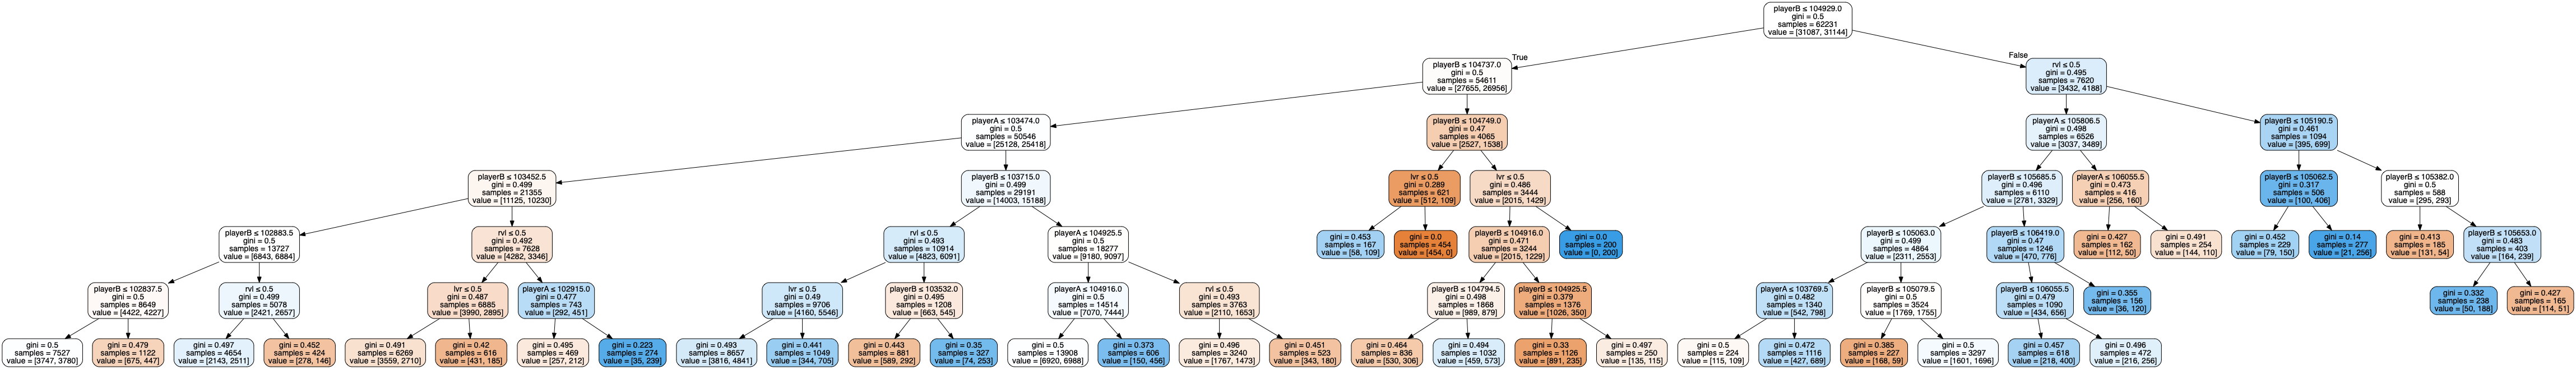

In [128]:
dot_data = StringIO()

export_graphviz(best_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#not the best model, as it is finding random information in the player numbers 

+ next steps for me are to fill in the NA values earlier for seed with max, since because they are unseeded players. May make the seeded model more valuable. 